In [3]:
#!/usr/bin/env python3
# learning_rate_graphs.py - Comprehensive Learning Rate Visualization

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

class LearningRateGraphs:
    """
    Generate multiple types of graphs to visualize learning rate dynamics
    """
    def __init__(self, history, output_dir='learning_rate_graphs'):
        """
        Initialize learning rate graph generator
        
        Args:
            history: Model training history
            output_dir: Directory to save graph outputs
        """
        self.history = history
        self.output_dir = output_dir
        
        # Ensure output directory exists
        import os
        os.makedirs(output_dir, exist_ok=True)
    
    def learning_rate_line_graph(self):
        """
        Create a line graph showing learning rate over epochs
        """
        plt.figure(figsize=(12, 6))
        
        # Extract learning rates if available
        if 'lr' in self.history.history:
            learning_rates = self.history.history['lr']
            epochs = range(1, len(learning_rates) + 1)
            
            plt.plot(epochs, learning_rates, marker='o')
            plt.title('Learning Rate Progression', fontsize=15)
            plt.xlabel('Epochs', fontsize=12)
            plt.ylabel('Learning Rate', fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.savefig(f'{self.output_dir}/learning_rate_line_graph.png')
            plt.close()
    
    def learning_rate_scatter_plot(self):
        """
        Create a scatter plot of learning rate vs. loss
        """
        plt.figure(figsize=(12, 6))
        
        # Extract learning rates and loss
        if 'lr' in self.history.history and 'loss' in self.history.history:
            learning_rates = self.history.history['lr']
            loss = self.history.history['loss']
            
            plt.scatter(learning_rates, loss, alpha=0.7, c=range(len(loss)), cmap='viridis')
            plt.colorbar(label='Epoch')
            plt.title('Learning Rate vs. Loss', fontsize=15)
            plt.xlabel('Learning Rate', fontsize=12)
            plt.ylabel('Loss', fontsize=12)
            plt.xscale('log')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.savefig(f'{self.output_dir}/learning_rate_scatter_plot.png')
            plt.close()
    
    def learning_rate_heatmap(self):
        """
        Create a heatmap of learning rate impact on training
        """
        plt.figure(figsize=(12, 8))
        
        # Prepare data
        if 'lr' in self.history.history:
            learning_rates = self.history.history['lr']
            loss = self.history.history['loss']
            accuracy = self.history.history.get('accuracy', [])
            
            # Create data matrix
            data = np.column_stack([learning_rates, loss, accuracy]) if accuracy else np.column_stack([learning_rates, loss])
            
            # Create heatmap
            sns.heatmap(data.T, cmap='YlGnBu', annot=True, fmt='.4f', 
                        xticklabels=[f'Epoch {i+1}' for i in range(len(learning_rates))],
                        yticklabels=['Learning Rate', 'Loss'] + (['Accuracy'] if accuracy else []))
            
            plt.title('Learning Rate Impact Heatmap', fontsize=15)
            plt.xlabel('Epochs', fontsize=12)
            plt.ylabel('Metrics', fontsize=12)
            plt.tight_layout()
            plt.savefig(f'{self.output_dir}/learning_rate_heatmap.png')
            plt.close()
    
    def learning_rate_boxplot(self):
        """
        Create a box plot of learning rate distribution
        """
        plt.figure(figsize=(12, 6))
        
        # Extract learning rates
        if 'lr' in self.history.history:
            learning_rates = self.history.history['lr']
            
            plt.boxplot(learning_rates)
            plt.title('Learning Rate Distribution', fontsize=15)
            plt.ylabel('Learning Rate', fontsize=12)
            plt.xlabel('Learning Rate', fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.savefig(f'{self.output_dir}/learning_rate_boxplot.png')
            plt.close()
    
    def generate_all_graphs(self):
        """
        Generate all types of learning rate graphs
        """
        # Generate different graph types
        self.learning_rate_line_graph()
        self.learning_rate_scatter_plot()
        self.learning_rate_heatmap()
        self.learning_rate_boxplot()
        
        print(f"Learning rate graphs saved in {self.output_dir}")

# Example usage function
def create_learning_rate_graphs(model, X_train, y_train, X_val, y_val):
    """
    Create comprehensive learning rate graphs
    
    Args:
        model: Keras model
        X_train: Training input data
        y_train: Training labels
        X_val: Validation input data
        y_val: Validation labels
    """
    # Create learning rate schedule
    initial_learning_rate = 0.001
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=10,
        decay_rate=0.9,
        staircase=True
    )
    
    # Create optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    
    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Train model and track learning rate
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        # Optional: Add a callback to log learning rate
        callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch: lr_schedule(epoch))]
    )
    
    # Create and generate graphs
    graph_generator = LearningRateGraphs(history)
    graph_generator.generate_all_graphs()
    
    return model, history

# Standalone script for demonstration
def main():
    # Create a simple model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    # Generate dummy data
    X_train = np.random.random((1000, 10))
    y_train = tf.keras.utils.to_categorical(np.random.randint(3, size=(1000, 1)), num_classes=3)
    X_val = np.random.random((200, 10))
    y_val = tf.keras.utils.to_categorical(np.random.randint(3, size=(200, 1)), num_classes=3)
    
    # Create learning rate graphs
    create_learning_rate_graphs(model, X_train, y_train, X_val, y_val)

if __name__ == '__main__':
    main()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: The output of the `schedule` function should be a float. Got: 0.0010000000474974513

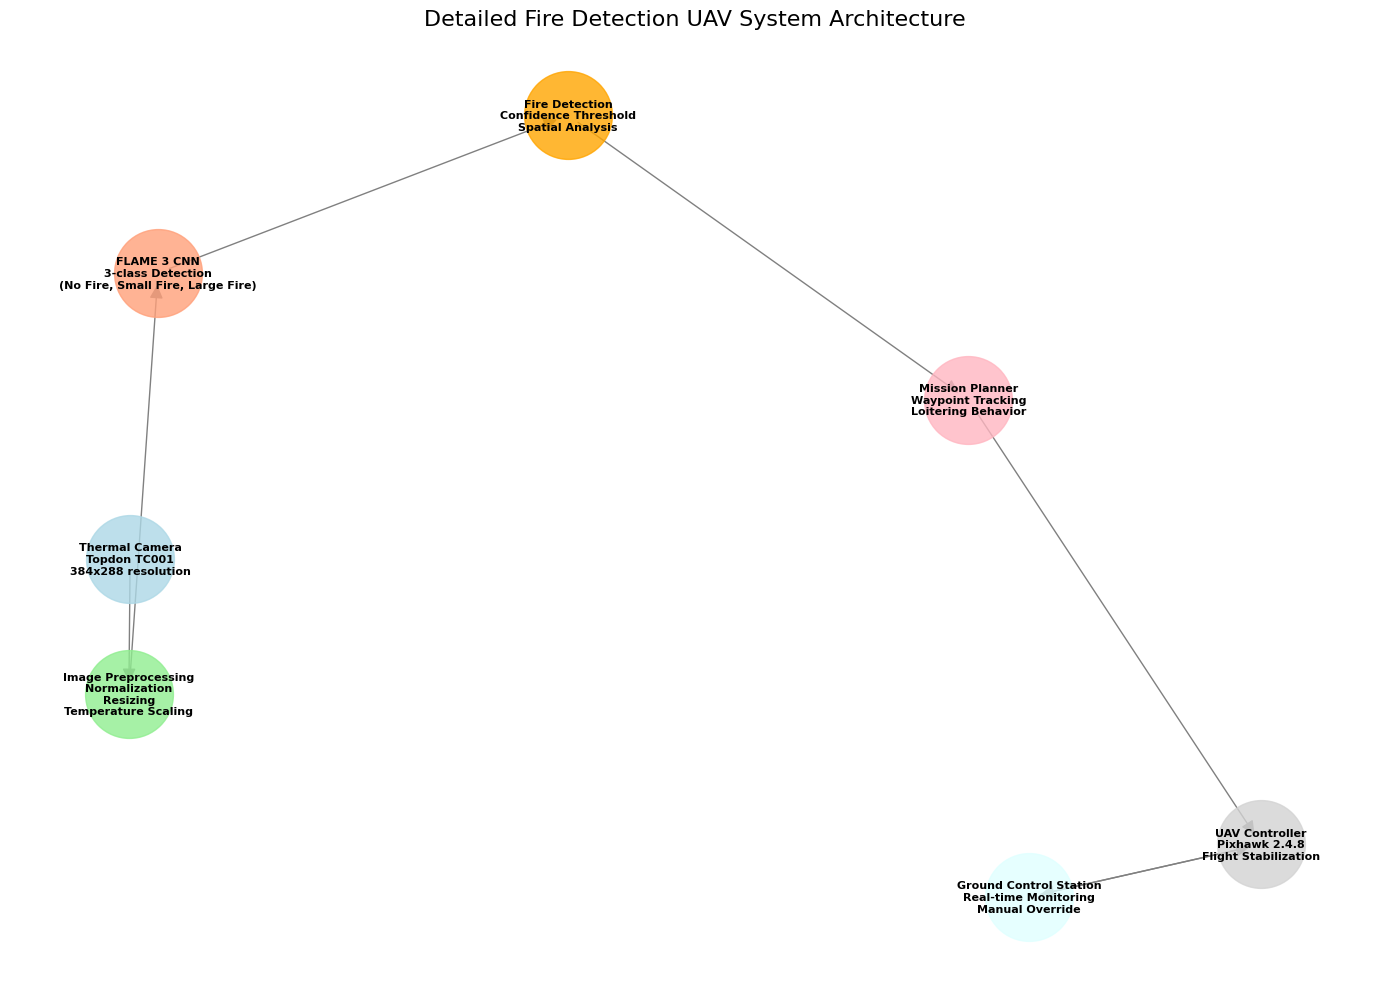

In [ ]:
#!/usr/bin/env python3
# flame3_model.py - Fire detection model for Topdon TC001 thermal camera on Raspberry Pi 4B

import os
import sys
import argparse
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers, backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    HAS_SEABORN = True
except ImportError:
    HAS_SEABORN = False
from tqdm import tqdm
import time
import datetime
import random
import shutil

# Set TensorFlow to only log errors
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

def focal_loss(gamma=2.0, alpha=0.25):
    """
    Focal loss for binary classification
    
    Args:
        gamma: Focusing parameter (higher values focus more on hard examples)
        alpha: Weighting factor for positive class
        
    Returns:
        Focal loss function
    """
    def focal_loss_fn(y_true, y_pred):
        # Ensure y_true is float32
        y_true = tf.cast(y_true, tf.float32)
        
        # Clip predictions to avoid numerical instability
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1 - K.epsilon())
        
        # Calculate binary cross-entropy
        bce = -(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
        
        # Calculate focal term
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        focal_term = tf.pow(1 - p_t, gamma)
        
        # Apply alpha weighting
        alpha_weight = y_true * alpha + (1 - y_true) * (1 - alpha)
        
        # Calculate focal loss
        loss = alpha_weight * focal_term * bce
        
        return tf.reduce_mean(loss)
    
    return focal_loss_fn

def preprocess_topdon_tc001(img, image_size=(64, 64)):
    """
    Preprocess thermal image from Topdon TC001 camera with improved normalization
    
    Args:
        img: Input thermal image
        image_size: Target size for resizing
        
    Returns:
        Preprocessed thermal image as numpy array
    """
    if img is None or img.size == 0:
        return np.zeros(image_size, dtype=np.float32)
    
    # Convert to grayscale if it's a color image
    # This removes color-based correlations like "purple = fire"
    if len(img.shape) == 3 and img.shape[2] == 3:
        # Use standard grayscale conversion (weighted)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    # Robust normalization technique using percentile-based normalization
    p_low, p_high = np.percentile(gray, [2, 98])
    
    # Ensure we don't divide by zero
    if p_high > p_low:
        normalized = np.clip((gray - p_low) / (p_high - p_low), 0, 1)
    else:
        normalized = np.zeros_like(gray, dtype=np.float32)
    
    # Apply histogram equalization to enhance thermal patterns
    equalized = cv2.equalizeHist((normalized * 255).astype(np.uint8))
    normalized = equalized.astype(np.float32) / 255.0
    
    # Resize to model input size
    resized = cv2.resize(normalized, image_size)
    
    return resized

def preprocess_thermal_tiff(tiff_img, image_size=(64, 64)):
    """
    Preprocess FLAME 3 thermal TIFF containing actual Celsius temperature values
    
    Args:
        tiff_img: Input thermal TIFF image with temperature values in Celsius
        image_size: Target size for resizing
        
    Returns:
        Preprocessed thermal image as numpy array
    """
    if tiff_img is None or tiff_img.size == 0:
        return np.zeros(image_size, dtype=np.float32)
    
    # FLAME 3 TIFF files contain Celsius temperature data directly
    # With maximum saturation around 500°C
    min_temp = 0.0
    max_temp = 500.0  # Per FLAME 3 paper specifications
    
    # Clip to fire-relevant temperature range
    clipped = np.clip(tiff_img, min_temp, max_temp)
    
    # Normalize to 0-1 range
    normalized = (clipped - min_temp) / (max_temp - min_temp)
    
    # Resize to model input size
    resized = cv2.resize(normalized, image_size)
    
    return resized

def determine_fire_severity(img):
    """
    Determine fire severity based on thermal image intensity
    
    Args:
        img: Thermal image (0-1 normalized)
        
    Returns:
        Severity level (0=No Fire, 1=Small Fire, 2=Large Fire)
    """
    # Calculate intensity metrics
    mean_intensity = np.mean(img)
    max_intensity = np.max(img)
    
    # Use both mean and max intensity for classification
    if max_intensity > 0.9 and mean_intensity > 0.4:
        return 2  # Large Fire
    elif max_intensity > 0.7 or mean_intensity > 0.25:
        return 1  # Small Fire
    else:
        return 0  # No Fire

def process_image(file_path, image_size=(64, 64)):
    """
    Process a single image file (thermal TIFF or regular image)
    
    Args:
        file_path: Path to the image file
        image_size: Target image size
        
    Returns:
        Processed image and fire severity
    """
    try:
        # Load image
        img = None
        if file_path.lower().endswith(('.tiff', '.tif')):
            img = cv2.imread(file_path, cv2.IMREAD_ANYDEPTH)
            if img is not None and img.dtype != np.uint8:
                # Process as temperature data
                thermal = preprocess_thermal_tiff(img, image_size)
            else:
                # Handle as regular image
                thermal = preprocess_topdon_tc001(img, image_size)
        else:
            img = cv2.imread(file_path)
            # Process as regular image
            thermal = preprocess_topdon_tc001(img, image_size)
        
        if img is None or thermal is None:
            return None, 0
        
        # Determine severity
        severity = determine_fire_severity(thermal)
        
        return thermal, severity
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None, 0

def stratified_train_val_test_split(X, y, test_size=0.2, val_size=0.15, random_state=42):
    """
    Create a stratified train/val/test split with balanced test set
    
    Args:
        X: Features
        y: Labels
        test_size: Fraction for test set
        val_size: Fraction of train data for validation
        random_state: Random seed
        
    Returns:
        X_train, X_val, X_test, y_train, y_val, y_test
    """
    # First split into train+val and test with stratification
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    # Then split train+val into train and val with stratification
    val_ratio = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, test_size=val_ratio, 
        random_state=random_state, stratify=y_trainval)
    
    # Ensure balanced class distribution in test set
    # If highly imbalanced, resample
    if min(np.sum(y_test == 0), np.sum(y_test == 1)) / len(y_test) < 0.25:
        print("Rebalancing test set - severe imbalance detected")
        # Get indices for each class
        class0_idx = np.where(y_test == 0)[0]
        class1_idx = np.where(y_test == 1)[0]
        
        # Find a balanced size (number of samples from each class)
        # If one class has very few samples, use them all and sample equally from the other
        min_size = min(len(class0_idx), len(class1_idx))
        target_size = max(min_size, min(50, max(len(class0_idx), len(class1_idx)) // 2))
        
        # Sample from each class
        if len(class0_idx) > target_size:
            # Downsample class 0
            class0_idx = np.random.choice(class0_idx, target_size, replace=False)
        
        if len(class1_idx) > target_size:
            # Downsample class 1
            class1_idx = np.random.choice(class1_idx, target_size, replace=False)
        
        # Combine indices for balanced test set
        combined_idx = np.concatenate([class0_idx, class1_idx])
        
        # Create balanced test set
        X_test = X_test[combined_idx]
        y_test = y_test[combined_idx]
    
    print(f"Train set - No Fire: {np.sum(y_train == 0)}, Fire: {np.sum(y_train == 1)}")
    print(f"Val set - No Fire: {np.sum(y_val == 0)}, Fire: {np.sum(y_val == 1)}")
    print(f"Test set - No Fire: {np.sum(y_test == 0)}, Fire: {np.sum(y_test == 1)}")
    
    return X_train, X_val, X_test, y_train, y_val, y_test

def load_and_preprocess_dataset(data_dir, image_size=(64, 64), test_size=0.2, val_size=0.15):
    """
    Load and preprocess FLAME3 dataset with improved class balancing
    
    Args:
        data_dir: Path to dataset directory
        image_size: Target image size
        test_size: Fraction of data for testing
        val_size: Fraction of training data for validation
        
    Returns:
        Training, validation and test datasets
    """
    print(f"Loading dataset from: {data_dir}")
    
    # Define dataset directories
    fire_dir = os.path.join(data_dir, 'Fire')
    no_fire_dir = os.path.join(data_dir, 'No_Fire')
    
    # Check if directories exist
    if not os.path.exists(fire_dir) or not os.path.exists(no_fire_dir):
        raise FileNotFoundError(f"Dataset directories not found in {data_dir}")
    
    # Find all image files
    extensions = ['.tiff', '.tif', '.jpg', '.jpeg', '.png']
    fire_files = []
    no_fire_files = []
    
    for ext in extensions:
        fire_files.extend([os.path.join(fire_dir, f) for f in os.listdir(fire_dir) 
                          if f.lower().endswith(ext.lower())])
        no_fire_files.extend([os.path.join(no_fire_dir, f) for f in os.listdir(no_fire_dir) 
                            if f.lower().endswith(ext.lower())])
    
    # Remove duplicates
    fire_files = list(set(fire_files))
    no_fire_files = list(set(no_fire_files))
    
    print(f"Found {len(fire_files)} fire images and {len(no_fire_files)} non-fire images")
    
    # Process all images
    X = []
    y = []
    
    print("Processing fire images...")
    for file_path in tqdm(fire_files):
        thermal, severity = process_image(file_path, image_size)
        if thermal is not None and severity > 0:  # Only add if classified as fire
            X.append(thermal)
            y.append(1)  # Binary classification: 1 for fire
    
    print("Processing no-fire images...")
    for file_path in tqdm(no_fire_files):
        thermal, severity = process_image(file_path, image_size)
        if thermal is not None:
            X.append(thermal)
            y.append(0)  # 0 for no fire
    
    # Convert to numpy arrays
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.int32)
    
    # Check if we have enough data
    if len(X) < 20:
        raise ValueError("Not enough valid images found in the dataset (minimum 20 required)")
    
    # Use our improved stratified split function
    X_train, X_val, X_test, y_train, y_val, y_test = stratified_train_val_test_split(
        X, y, test_size=test_size, val_size=val_size, random_state=42)
    
    # Add channel dimension
    X_train = X_train.reshape(-1, image_size[0], image_size[1], 1)
    X_val = X_val.reshape(-1, image_size[0], image_size[1], 1)
    X_test = X_test.reshape(-1, image_size[0], image_size[1], 1)
    
    # Print dataset stats
    print(f"\nDataset statistics:")
    print(f"Training: {len(X_train)} images, {100*np.mean(y_train):.1f}% Fire")
    print(f"Validation: {len(X_val)} images, {100*np.mean(y_val):.1f}% Fire")
    print(f"Test: {len(X_test)} images, {100*np.mean(y_test):.1f}% Fire")
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

def create_fire_detection_model(input_shape, l2_strength=0.003, dropout_rate=0.65):
    """
    Create an advanced fire detection CNN model with improved accuracy and regularization
    
    Args:
        input_shape: Input image shape
        l2_strength: L2 regularization strength
        dropout_rate: Dropout rate for regularization
        
    Returns:
        Compiled Keras model
    """
    # Input preprocessing and initial feature extraction
    inputs = layers.Input(shape=input_shape)
    
    # Initial normalization and feature extraction
    x = layers.BatchNormalization()(inputs)
    
    # First convolutional block with expanded capabilities
    x = layers.Conv2D(32, (3, 3), padding='same', 
                      kernel_regularizer=regularizers.l2(l2_strength),
                      activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, (3, 3), padding='same', 
                      kernel_regularizer=regularizers.l2(l2_strength),
                      activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(dropout_rate / 2)(x)
    
    # Residual block with increased complexity
    residual = x
    x = layers.Conv2D(64, (3, 3), padding='same', 
                      kernel_regularizer=regularizers.l2(l2_strength),
                      activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), padding='same', 
                      kernel_regularizer=regularizers.l2(l2_strength))(x)
    x = layers.BatchNormalization()(x)
    
    # Residual connection with projection if needed
    if residual.shape[-1] != x.shape[-1]:
        residual = layers.Conv2D(64, (1, 1), padding='same')(residual)
    x = layers.Add()([x, residual])
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(dropout_rate)(x)
    
    # Enhanced feature extraction block
    x = layers.Conv2D(128, (3, 3), padding='same', 
                      kernel_regularizer=regularizers.l2(l2_strength),
                      activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), padding='same', 
                      kernel_regularizer=regularizers.l2(l2_strength),
                      activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(dropout_rate)(x)
    
    # Squeeze and Excitation block for channel-wise attention
    def squeeze_excitation_block(input_layer, ratio=16):
        channels = input_layer.shape[-1]
        
        # Global Average Pooling
        se = layers.GlobalAveragePooling2D()(input_layer)
        
        # Fully connected layers for channel attention
        se = layers.Dense(channels // ratio, activation='relu')(se)
        se = layers.Dense(channels, activation='sigmoid')(se)
        
        # Reshape to match input layer
        se = layers.Reshape((1, 1, channels))(se)
        
        # Scale input by attention weights
        return layers.Multiply()([input_layer, se])
    
    x = squeeze_excitation_block(x)
    
    # Classifier block with multiple dense layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, 
                     activation='relu',
                     kernel_regularizer=regularizers.l2(l2_strength))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    
    x = layers.Dense(128, 
                     activation='relu',
                     kernel_regularizer=regularizers.l2(l2_strength))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate / 2)(x)

    # Multiple output classes for more granular fire detection
    # Output layer for binary classification
    outputs = layers.Dense(1, activation='sigmoid', 
                           kernel_regularizer=regularizers.l2(l2_strength))(x)
    # Create the model
    model = models.Model(inputs=inputs, outputs=outputs)
    
    return model

def create_data_generator(augmentation=True):
    """
    Create data generator for training with augmentation
    
    Args:
        augmentation: Whether to apply data augmentation
    
    Returns:
        ImageDataGenerator instance
    """
    if augmentation:
        return ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest'
        )
    else:
        return ImageDataGenerator()

def find_optimal_threshold(model, X_val, y_val):
    """
    Find the optimal decision threshold based on F1 score
    
    Args:
        model: Trained model
        X_val: Validation features
        y_val: Validation labels
        
    Returns:
        Optimal threshold
    """
    # Get predictions
    y_pred_probs = model.predict(X_val)[:,0]
    
    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_val, y_pred_probs)
    
    # Calculate F1 score for each threshold
    f1_scores = 2 * precision * recall / (precision + recall + 1e-7)
    
    # Find threshold with highest F1 score
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    
    print(f"Best threshold: {best_threshold:.3f} with F1 score: {f1_scores[best_idx]:.4f}")
    print(f"At threshold {best_threshold:.3f}: Precision={precision[best_idx]:.4f}, Recall={recall[best_idx]:.4f}")
    
    # Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
    plt.plot(thresholds, f1_scores[:-1], 'r-.', label='F1 Score')
    plt.axvline(x=best_threshold, color='k', linestyle='-', label=f'Best threshold: {best_threshold:.3f}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1 Score vs Threshold')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    return best_threshold

def train_model_with_cv(model_fn, train_data, val_data, epochs=50, batch_size=32, 
                      learning_rate=0.001, output_dir='models', model_name='flame3_model',
                      use_focal_loss=True):
    """
    Train with more robust early stopping and additional validation checks
    
    Args:
        model_fn: Function to create model
        train_data: Training data tuple (X_train, y_train)
        val_data: Validation data tuple (X_val, y_val)
        epochs: Number of training epochs
        batch_size: Batch size
        learning_rate: Initial learning rate
        output_dir: Directory to save model files
        model_name: Base name for saved model files
        use_focal_loss: Whether to use focal loss instead of binary crossentropy
        
    Returns:
        Trained model, training history, and optimal threshold
    """
    X_train, y_train = train_data
    X_val, y_val = val_data
    
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Create model
    input_shape = X_train.shape[1:] 
    model = model_fn(input_shape=input_shape)
    
    # Select loss function
    if use_focal_loss:
        loss_fn = focal_loss(gamma=2.0, alpha=0.25)
        loss_name = "focal_loss"
    else:
        loss_fn = 'binary_crossentropy'
        loss_name = 'binary_crossentropy'
    
    # Compile model with Adam optimizer
    # Compile model with Adam optimizer
    model.compile(
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',  # Change from focal_loss to binary_crossentropy
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc')
        ]
    )
    
    # Create training data generator with augmentation
    datagen = create_data_generator(augmentation=True)
    datagen.fit(X_train)
    
    # Calculate class weights to handle imbalance
    class_counts = np.bincount(y_train)
    total = np.sum(class_counts)
    class_weights = {i: total / (len(class_counts) * count) if count > 0 else 1.0 
                    for i, count in enumerate(class_counts)}
    
    print(f"Class weights: {class_weights}")
    
    # Set up callbacks with stricter early stopping
    model_checkpoint_path = os.path.join(output_dir, f"{model_name}_best.h5")
    callbacks_list = [
        callbacks.ModelCheckpoint(
            model_checkpoint_path, 
            save_best_only=True, 
            monitor='val_loss'
        ),
        callbacks.EarlyStopping(
            patience=8,  # Decreased patience to stop earlier if needed
            restore_best_weights=True, 
            monitor='val_loss'
        ),
        callbacks.ReduceLROnPlateau(
            factor=0.5, 
            patience=4,  # Reduced patience
            min_lr=0.00001, 
            monitor='val_loss'
        )
    ]
    
    # Train the model
    print(f"\nTraining fire detection model for {epochs} epochs with batch size {batch_size}...")
    print(f"Using {loss_name} loss function")
    start_time = time.time()
    
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        steps_per_epoch=len(X_train) // batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=callbacks_list,
        class_weight=class_weights,
        verbose=1
    )
    
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
    
    # Find optimal threshold
    print("\nFinding optimal decision threshold...")
    optimal_threshold = find_optimal_threshold(model, X_val, y_val)
    
    # Save the final model
    final_model_path = os.path.join(output_dir, f"{model_name}.h5")
    model.save(final_model_path)
    print(f"Final model saved to {final_model_path}")
    
    # Save optimal threshold
    threshold_info = {
        "optimal_threshold": float(optimal_threshold),
        "model_path": final_model_path,
        "date_trained": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    
    threshold_path = os.path.join(output_dir, f"{model_name}_threshold.txt")
    with open(threshold_path, 'w') as f:
        for key, value in threshold_info.items():
            f.write(f"{key}: {value}\n")
    
    print(f"Threshold information saved to {threshold_path}")
    
    return model, history, optimal_threshold

def perform_cross_validation(X, y, n_splits=5, model_fn=create_fire_detection_model, 
                          batch_size=32, epochs=30, learning_rate=0.001,
                          use_focal_loss=True):
    """
    Perform cross-validation to get more reliable performance estimates
    
    Args:
        X: Input features
        y: Target labels
        n_splits: Number of CV folds
        model_fn: Function to create model
        batch_size: Batch size for training
        epochs: Number of epochs
        learning_rate: Learning rate
        use_focal_loss: Whether to use focal loss
        
    Returns:
        Dictionary of cross-validation results
    """
    # Initialize stratified K-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Store metrics
    fold_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'auc': [],
        'f1_score': [],
        'optimal_threshold': []
    }
    
    print(f"Starting {n_splits}-fold cross-validation...")
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"\nTraining fold {fold+1}/{n_splits}")
        
        # Split data
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        
        # Create and compile model
        model = model_fn(input_shape=X_train_fold.shape[1:])
        
        # Select loss function
        if use_focal_loss:
            loss_fn = focal_loss(gamma=2.0, alpha=0.25)
        else:
            loss_fn = 'binary_crossentropy'
            
        model.compile(
            optimizer=optimizers.Adam(learning_rate=learning_rate),
            loss=loss_fn,
            metrics=['accuracy', 
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall'),
                    tf.keras.metrics.AUC(name='auc')]
        )
        
        # Train model with early stopping
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=8,
            restore_best_weights=True
        )
        
        reduce_lr = callbacks.ReduceLROnPlateau(
            factor=0.5,
            patience=4,
            min_lr=0.00001,
            monitor='val_loss'
        )
        
        # Calculate class weights
        class_counts = np.bincount(y_train_fold)
        total = np.sum(class_counts)
        class_weights = {i: total / (len(class_counts) * count) if count > 0 else 1.0 
                        for i, count in enumerate(class_counts)}
        
        history = model.fit(
            X_train_fold, y_train_fold,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_val_fold, y_val_fold),
            callbacks=[early_stopping, reduce_lr],
            class_weight=class_weights,
            verbose=1
        )
        
        # Find optimal threshold
        optimal_threshold = find_optimal_threshold(model, X_val_fold, y_val_fold)
        
        # Evaluate model with optimal threshold
        y_pred_probs = model.predict(X_val_fold)[:,0]
        y_pred = (y_pred_probs >= optimal_threshold).astype(int)
        
        # Calculate metrics
        val_metrics = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        metrics_dict = dict(zip(model.metrics_names, val_metrics))
        
        # Store metrics
        fold_metrics['accuracy'].append(metrics_dict['accuracy'])
        fold_metrics['precision'].append(metrics_dict['precision'])
        fold_metrics['recall'].append(metrics_dict['recall'])
        fold_metrics['auc'].append(metrics_dict['auc'])
        fold_metrics['optimal_threshold'].append(optimal_threshold)
        
        # Calculate F1 score
        f1 = f1_score(y_val_fold, y_pred)
        fold_metrics['f1_score'].append(f1)
        
        print(f"Fold {fold+1} metrics - Accuracy: {metrics_dict['accuracy']:.4f}, Precision: {metrics_dict['precision']:.4f}, Recall: {metrics_dict['recall']:.4f}, AUC: {metrics_dict['auc']:.4f}, F1: {f1:.4f}")
    
    # Calculate average metrics
    for metric in fold_metrics:
        avg_value = np.mean(fold_metrics[metric])
        std_value = np.std(fold_metrics[metric])
        print(f"Average {metric}: {avg_value:.4f} ± {std_value:.4f}")
    
    return fold_metrics

def evaluate_model(model, test_data, threshold=0.5):
    """
    Evaluate the trained model on test data with custom threshold
    
    Args:
        model: Trained Keras model
        test_data: Test data tuple (X_test, y_test)
        threshold: Decision threshold (default: 0.5)
        
    Returns:
        Dictionary of evaluation metrics
    """
    X_test, y_test = test_data
    
    # Evaluate on test set
    print("\nEvaluating model on test set...")
    test_metrics = model.evaluate(X_test, y_test, verbose=1)
    
    metrics_names = model.metrics_names
    metrics_dict = {name: value for name, value in zip(metrics_names, test_metrics)}
    
    # Get predictions with custom threshold
    y_pred_probs = model.predict(X_test)
    y_pred_classes = (y_pred_probs >= threshold).astype(int).reshape(-1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    
    # Compute precision, recall, F1 for each class
    # Identify the unique classes present in the data
    unique_classes = sorted(np.unique(np.concatenate([y_test, y_pred_classes])))
    labels = unique_classes
    
    # Create appropriate target names based on the classes present
    class_names = ['No Fire', 'Fire']
    target_names = [class_names[i] for i in unique_classes if i < len(class_names)]
    
    report = classification_report(y_test, y_pred_classes, 
                                  labels=labels,
                                  target_names=target_names, 
                                  output_dict=True)
    
    # Add confusion matrix and classification report to metrics
    metrics_dict['confusion_matrix'] = cm
    metrics_dict['classification_report'] = report
    
    # Custom evaluation with threshold
    print(f"\nEvaluation with threshold {threshold:.3f}:")
    print(f"Confusion Matrix:\n{cm}")
    
    # Calculate accuracy, precision, recall with custom threshold
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Add custom metrics to the dictionary
    metrics_dict['custom_accuracy'] = accuracy
    metrics_dict['custom_precision'] = precision
    metrics_dict['custom_recall'] = recall
    metrics_dict['custom_specificity'] = specificity
    metrics_dict['custom_f1'] = f1
    
    return metrics_dict

def plot_training_history(history, output_dir):
    """
    Plot training history metrics
    
    Args:
        history: Training history from model.fit()
        output_dir: Directory to save plot images
    """
    os.makedirs(output_dir, exist_ok=True)
    
    # Plot accuracy and loss
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'training_history.png'))
    plt.close()
    
    # Plot precision, recall, AUC
    if 'precision' in history.history and 'recall' in history.history and 'auc' in history.history:
        plt.figure(figsize=(15, 4))
        
        # Plot precision
        plt.subplot(1, 3, 1)
        plt.plot(history.history['precision'])
        plt.plot(history.history['val_precision'])
        plt.title('Model Precision')
        plt.ylabel('Precision')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='lower right')
        plt.grid(True, linestyle='--', alpha=0.6)
        
        # Plot recall
        plt.subplot(1, 3, 2)
        plt.plot(history.history['recall'])
        plt.plot(history.history['val_recall'])
        plt.title('Model Recall')
        plt.ylabel('Recall')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='lower right')
        plt.grid(True, linestyle='--', alpha=0.6)
        
        # Plot AUC
        plt.subplot(1, 3, 3)
        plt.plot(history.history['auc'])
        plt.plot(history.history['val_auc'])
        plt.title('Model AUC')
        plt.ylabel('AUC')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='lower right')
        plt.grid(True, linestyle='--', alpha=0.6)
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'training_metrics.png'))
        plt.close()

def plot_confusion_matrix(cm, output_dir, threshold=0.5):
    """
    Plot confusion matrix
    
    Args:
        cm: Confusion matrix
        output_dir: Directory to save plot image
        threshold: Threshold used for classification
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (threshold={threshold:.3f})')
    plt.colorbar()
    
    classes = ['No Fire', 'Fire']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add text annotations in cells
    threshold = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > threshold else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(os.path.join(output_dir, f'confusion_matrix_t{threshold:.2f}.png'))
    plt.close()

def optimize_for_tflite(model_path, output_dir, quantize=True):
    """
    Convert Keras model to TFLite format with optimizations for Raspberry Pi
    
    Args:
        model_path: Path to trained Keras model (.h5)
        output_dir: Directory to save optimized model
        quantize: Whether to quantize the model
        
    Returns:
        Path to the optimized TFLite model
    """
    # Load the model
    model = tf.keras.models.load_model(model_path, 
                                     custom_objects={'focal_loss_fn': focal_loss()})
    
    # Create TFLite converter
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    
    # Apply optimizations
    if quantize:
        # Enable quantization
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        
        # Specify target type to float16 (good balance of accuracy and performance)
        converter.target_spec.supported_types = [tf.float16]
    
    # Convert model
    tflite_model = converter.convert()
    
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Save model
    tflite_model_path = os.path.join(output_dir, 'flame3_optimized.tflite')
    with open(tflite_model_path, 'wb') as f:
        f.write(tflite_model)
    
    # Print model size
    model_size = os.path.getsize(tflite_model_path) / 1024
    print(f"TFLite model size: {model_size:.2f} KB")
    
    return tflite_model_path

def is_running_in_jupyter():
    """Check if code is running in Jupyter notebook"""
    try:
        from IPython import get_ipython
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':  # Jupyter notebook or qtconsole
            return True
        elif shell == 'TerminalInteractiveShell':  # Terminal IPython
            return False
        else:
            return False
    except (NameError, ImportError):  # Not IPython/Jupyter environment
        return False

def predict_image(model_path, image_path, image_size=(64, 64), threshold=0.5):
    """
    Predict whether an image contains fire using the trained model
    
    Args:
        model_path: Path to the trained model (.h5 or .tflite)
        image_path: Path to the image to predict
        image_size: Image size to resize to
        threshold: Decision threshold
        
    Returns:
        Prediction result (probability of fire)
    """
    # Load image
    img = None
    if image_path.lower().endswith(('.tiff', '.tif')):
        img = cv2.imread(image_path, cv2.IMREAD_ANYDEPTH)
        if img is not None and img.dtype != np.uint8:
            # Process as temperature data
            processed_img = preprocess_thermal_tiff(img, image_size)
        else:
            # Handle as regular image
            processed_img = preprocess_topdon_tc001(img, image_size)
    else:
        img = cv2.imread(image_path)
        # Process as regular image
        processed_img = preprocess_topdon_tc001(img, image_size)
    
    if img is None:
        raise ValueError(f"Failed to load image from {image_path}")
    
    # Add batch and channel dimensions
    processed_img = processed_img.reshape(1, image_size[0], image_size[1], 1)
    
    # Check if model is TFLite
    if model_path.endswith('.tflite'):
        # Load TFLite model
        interpreter = tf.lite.Interpreter(model_path=model_path)
        interpreter.allocate_tensors()
        
        # Get input and output details
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()
        
        # Prepare input data
        input_shape = input_details[0]['shape']
        processed_img = np.array(processed_img, dtype=np.float32)
        
        # Set input data
        interpreter.set_tensor(input_details[0]['index'], processed_img)
        
        # Run inference
        interpreter.invoke()
        
        # Get output data
        fire_probability = interpreter.get_tensor(output_details[0]['index'])[0][0]
    else:
        # Load Keras model
        custom_objects = {'focal_loss_fn': focal_loss()}
        model = tf.keras.models.load_model(model_path, custom_objects=custom_objects)
        
        # Make prediction
        fire_probability = model.predict(processed_img)[0][0]
    
    # Apply threshold
    fire_detected = fire_probability >= threshold
    
    return float(fire_probability), bool(fire_detected)

def real_time_detection(model_path, camera_id=0, thermal_camera=True, threshold=0.5):
    """
    Real-time fire detection using webcam or thermal camera
    
    Args:
        model_path: Path to the trained model (.h5 or .tflite)
        camera_id: Camera device ID
        thermal_camera: Whether using a thermal camera
        threshold: Detection threshold
    """
    # Load model
    is_tflite = model_path.endswith('.tflite')
    if is_tflite:
        # Load TFLite model
        interpreter = tf.lite.Interpreter(model_path=model_path)
        interpreter.allocate_tensors()
        
        # Get input and output details
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()
        input_shape = input_details[0]['shape']
        image_size = (input_shape[1], input_shape[2])
    else:
        # Load Keras model
        custom_objects = {'focal_loss_fn': focal_loss()}
        model = tf.keras.models.load_model(model_path, custom_objects=custom_objects)
        image_size = model.input_shape[1:3]  # (height, width)
    
    # Open camera
    cap = cv2.VideoCapture(camera_id)
    if not cap.isOpened():
        print(f"Error: Could not open camera {camera_id}")
        return
    
    print("Starting real-time detection...")
    print(f"Using threshold: {threshold:.3f}")
    print("Press 'q' to quit")
    
    while True:
        # Capture frame
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture frame")
            break
        
        # Process frame
        if thermal_camera:
            # Process as thermal image
            processed_frame = preprocess_topdon_tc001(frame, image_size)
        else:
            # Convert to grayscale for regular camera
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            processed_frame = preprocess_topdon_tc001(gray, image_size)
        
        # Add batch and channel dimensions
        processed_frame = processed_frame.reshape(1, image_size[0], image_size[1], 1)
        
        # Make prediction
        if is_tflite:
            # Use TFLite model
            interpreter.set_tensor(input_details[0]['index'], 
                                 processed_frame.astype(np.float32))
            interpreter.invoke()
            fire_probability = interpreter.get_tensor(output_details[0]['index'])[0][0]
        else:
            # Use Keras model
            fire_probability = model.predict(processed_frame, verbose=0)[0][0]
        
        # Apply threshold for detection
        fire_detected = fire_probability >= threshold
        
        # Display result
        display_frame = frame.copy()
        
        # Add prediction text
        status = "FIRE DETECTED" if fire_detected else "NO FIRE"
        color = (0, 0, 255) if fire_detected else (0, 255, 0)
        cv2.putText(display_frame, f"{status}: {fire_probability:.4f}", 
                   (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
        
        # Display threshold
        cv2.putText(display_frame, f"Threshold: {threshold:.3f}", 
                   (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
        
        # Display frame
        cv2.imshow('Fire Detection', display_frame)
        
        # Exit on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release resources
    cap.release()
    cv2.destroyAllWindows()

def plot_training_history_extended(history, output_dir):
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Plot core metrics: accuracy and loss
    plt.figure(figsize=(16, 12))
    
    # Plot loss
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], 'b-', label='Training Loss')
    plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Model Loss Over Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Plot accuracy
    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    plt.title('Model Accuracy Over Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Plot precision
    plt.subplot(2, 2, 3)
    plt.plot(history.history['precision'], 'b-', label='Training Precision')
    plt.plot(history.history['val_precision'], 'r-', label='Validation Precision')
    plt.title('Model Precision Over Epochs', fontsize=14)
    plt.ylabel('Precision', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Plot recall
    plt.subplot(2, 2, 4)
    plt.plot(history.history['recall'], 'b-', label='Training Recall')
    plt.plot(history.history['val_recall'], 'r-', label='Validation Recall')
    plt.title('Model Recall Over Epochs', fontsize=14)
    plt.ylabel('Recall', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'training_metrics_detailed.png'), dpi=300)
    plt.close()    

def plot_precision_recall_curve(model, X_val, y_val, output_dir):
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Get predictions
    y_pred_probs = model.predict(X_val)[:,0]
    
    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_val, y_pred_probs)
    
    # Calculate F1 score for each threshold
    f1_scores = 2 * precision * recall / (precision + recall + 1e-7)
    
    # Find threshold with highest F1 score
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    
    # Plot precision-recall curve
    plt.figure(figsize=(12, 8))
    plt.plot(recall, precision, 'b-', linewidth=2, label='Precision-Recall curve')
    plt.fill_between(recall, precision, alpha=0.2, color='blue')
    plt.scatter(recall[best_idx], precision[best_idx], c='red', s=100, 
                label=f'Best threshold: {best_threshold:.3f}')
    
    # Plot F1 contours
    f1_levels = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    for f1 in f1_levels:
        x = np.linspace(0.01, 1, 100)
        y = f1 * x / (2 * x - f1)
        plt.plot(x, y, '--', color='gray', alpha=0.5)
        plt.annotate(f'F1={f1}', xy=(0.9, f1*0.9/(2*0.9-f1)), 
                    color='gray', alpha=0.7, fontsize=8)
    
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curve', fontsize=14)
    plt.legend(loc="best", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.savefig(os.path.join(output_dir, 'precision_recall_curve.png'), dpi=300)
    plt.close()
    
    return best_threshold

def plot_enhanced_confusion_matrix(y_true, y_pred, output_dir, threshold=0.5):
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate metrics
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    plt.figure(figsize=(10, 8))
    
    # Plot confusion matrix
    if HAS_SEABORN:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    else:
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        # Add text annotations in cells
        thresh = cm.max() / 2
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, format(cm[i, j], 'd'),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
    
    # Add labels and title
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.xticks([0.5, 1.5], ['No Fire', 'Fire'], fontsize=10)
    plt.yticks([0.5, 1.5], ['No Fire', 'Fire'], fontsize=10, rotation=0)
    plt.title(f'Confusion Matrix\nThreshold: {threshold:.3f}', fontsize=14)
    
    # Add metrics as text
    plt.figtext(0.65, 0.40, f"Accuracy: {accuracy:.4f}", fontsize=12)
    plt.figtext(0.65, 0.35, f"Precision: {precision:.4f}", fontsize=12)
    plt.figtext(0.65, 0.30, f"Recall: {recall:.4f}", fontsize=12)
    plt.figtext(0.65, 0.25, f"Specificity: {specificity:.4f}", fontsize=12)
    plt.figtext(0.65, 0.20, f"F1 Score: {f1:.4f}", fontsize=12)
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'confusion_matrix_t{threshold:.2f}_enhanced.png'), dpi=300)
    plt.close()
    
def plot_prediction_distribution(model, X_test, y_test, output_dir, threshold=0.5):
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Get predictions
    y_pred = model.predict(X_test)[:,0]
    
    # Separate predictions by class
    fire_preds = y_pred[y_test == 1]
    nofire_preds = y_pred[y_test == 0]
    
    plt.figure(figsize=(12, 6))
    
    # Plot histograms
    plt.hist(nofire_preds, bins=25, alpha=0.7, color='green', 
             label=f'No Fire (n={len(nofire_preds)})', density=True)
    plt.hist(fire_preds, bins=25, alpha=0.7, color='red', 
             label=f'Fire (n={len(fire_preds)})', density=True)
    
    # Add threshold line
    plt.axvline(x=threshold, color='black', linestyle='--', 
                label=f'Threshold: {threshold:.3f}')
    
    # Add styling
    plt.xlabel('Prediction Score', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title('Distribution of Prediction Scores by Class', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.3)
    
    plt.savefig(os.path.join(output_dir, 'prediction_distribution.png'), dpi=300)
    plt.close()

def plot_error_examples(model, X_test, y_test, output_dir, threshold=0.5, num_examples=3):
    """
    Plot examples of false positives and false negatives
    """
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Get predictions
    y_pred_probs = model.predict(X_test)[:,0]
    y_pred = (y_pred_probs >= threshold).astype(int)
    
    # Find false positives and false negatives
    fp_indices = np.where((y_test == 0) & (y_pred == 1))[0]
    fn_indices = np.where((y_test == 1) & (y_pred == 0))[0]
    tp_indices = np.where((y_test == 1) & (y_pred == 1))[0]
    tn_indices = np.where((y_test == 0) & (y_pred == 0))[0]
    
    # Limit to the requested number of examples
    fp_indices = fp_indices[:num_examples] if len(fp_indices) >= num_examples else fp_indices
    fn_indices = fn_indices[:num_examples] if len(fn_indices) >= num_examples else fn_indices
    tp_indices = tp_indices[:num_examples] if len(tp_indices) >= num_examples else tp_indices
    tn_indices = tn_indices[:num_examples] if len(tn_indices) >= num_examples else tn_indices
    
    # Function to plot a set of examples
    def plot_examples(indices, title, file_prefix):
        if len(indices) == 0:
            print(f"No {title} examples found")
            return
        
        plt.figure(figsize=(12, 4 * len(indices)))
        for i, idx in enumerate(indices):
            # Plot the image
            plt.subplot(len(indices), 1, i + 1)
            plt.imshow(X_test[idx, :, :, 0], cmap='inferno')
            plt.title(f"{title} - Prediction: {y_pred_probs[idx]:.4f}, True: {y_test[idx]}", fontsize=12)
            plt.colorbar(label='Normalized Intensity')
            plt.axis('on')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'{file_prefix}.png'), dpi=300)
        plt.close()
    
    # Plot examples
    plot_examples(fp_indices, "False Positive", "false_positives")
    plot_examples(fn_indices, "False Negative", "false_negatives")
    plot_examples(tp_indices, "True Positive", "true_positives")
    plot_examples(tn_indices, "True Negative", "true_negatives")

def generate_gradcam(model, img, layer_name, category_index=0):
    """
    Generate Grad-CAM visualization for a given image
    
    Args:
        model: Trained model
        img: Input image (with batch and channel dimensions)
        layer_name: Name of the layer to use for Grad-CAM
        category_index: Index of the category to visualize (0 for binary classification)
        
    Returns:
        Heatmap as a numpy array
    """
    # Create a model that outputs both the feature maps and the predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(layer_name).output, model.output]
    )
    
    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Run the model and record the operations
        conv_outputs, predictions = grad_model(img)
        loss = predictions[:, category_index]
    
    # Gradient of the output with respect to the feature map
    grads = tape.gradient(loss, conv_outputs)
    
    # Global average pooling of the gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Weight the feature maps with the gradients
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs[0]), axis=-1)
    
    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + tf.keras.backend.epsilon())
    
    return heatmap.numpy()

def plot_saliency_maps(model, X_test, y_test, output_dir, num_examples=3):
    """
    Generate and plot saliency maps for selected examples
    
    Args:
        model: Trained model
        X_test: Test images
        y_test: Test labels
        output_dir: Directory to save plots
        num_examples: Number of examples to plot for each class
    """
    os.makedirs(output_dir, exist_ok=True)
    
    # Get predictions
    y_pred = model.predict(X_test)[:,0]
    
    # Find true positives (actual fires correctly predicted)
    tp_indices = np.where((y_test == 1) & (y_pred >= 0.5))[0]
    
    # Find true negatives (non-fires correctly predicted)
    tn_indices = np.where((y_test == 0) & (y_pred < 0.5))[0]
    
    # Limit to the requested number of examples
    tp_indices = tp_indices[:num_examples] if len(tp_indices) >= num_examples else tp_indices
    tn_indices = tn_indices[:num_examples] if len(tn_indices) >= num_examples else tn_indices
    
    # Find the last convolutional layer
    last_conv_layer = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer = layer.name
            break
    
    if last_conv_layer is None:
        print("Could not find convolutional layer for saliency map")
        return
    
    # Function to plot a set of examples with saliency maps
    def plot_examples(indices, title):
        if len(indices) == 0:
            print(f"No {title} examples found")
            return
        
        plt.figure(figsize=(12, 4 * len(indices)))
        for i, idx in enumerate(indices):
            img = X_test[idx:idx+1]
            
            # Generate saliency map
            heatmap = generate_gradcam(model, img, last_conv_layer)
            
            # Resize heatmap to match the input image size
            heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[2]))
            
            # Original image - convert to 3 channels for overlay
            img_display = np.repeat(img[0, :, :, 0][:, :, np.newaxis], 3, axis=2)
            
            # Normalize image
            img_display = (img_display - np.min(img_display)) / (np.max(img_display) - np.min(img_display))
            
            # Convert heatmap to RGB
            heatmap_rgb = np.zeros((heatmap.shape[0], heatmap.shape[1], 3))
            heatmap_rgb[:, :, 0] = heatmap  # Red channel
            
            # Overlay heatmap on original image
            alpha = 0.4
            overlay = img_display * (1 - alpha) + heatmap_rgb * alpha
            
            # Plot original image
            plt.subplot(len(indices), 2, i*2 + 1)
            plt.imshow(img[0, :, :, 0], cmap='inferno')
            plt.title(f"Original - Pred: {y_pred[idx]:.4f}, True: {y_test[idx]}", fontsize=10)
            plt.colorbar(label='Normalized Intensity')
            plt.axis('on')
            
            # Plot saliency map overlay
            plt.subplot(len(indices), 2, i*2 + 2)
            plt.imshow(overlay)
            plt.title(f"Saliency Map Overlay", fontsize=10)
            plt.axis('on')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'saliency_{title.lower().replace(" ", "_")}.png'), dpi=300)
        plt.close()
    
    # Plot examples
    plot_examples(tp_indices, "True Positive")
    plot_examples(tn_indices, "True Negative")

def visualize_fire_samples(X_train, y_train, output_dir, num_samples=5):
    """
    Visualize sample fire and non-fire thermal images
    
    Args:
        X_train: Training images
        y_train: Training labels
        output_dir: Directory to save visualizations
        num_samples: Number of samples to show for each class
    """
    os.makedirs(output_dir, exist_ok=True)
    
    # Get indices for fire and no-fire samples
    fire_indices = np.where(y_train == 1)[0]
    nofire_indices = np.where(y_train == 0)[0]
    
    # Randomly select samples
    np.random.shuffle(fire_indices)
    np.random.shuffle(nofire_indices)
    
    fire_indices = fire_indices[:num_samples]
    nofire_indices = nofire_indices[:num_samples]
    
    # Plot fire samples
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(fire_indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X_train[idx, :, :, 0], cmap='inferno')
        plt.title(f"Fire Sample {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'fire_samples.png'), dpi=300)
    plt.close()
    
    # Plot no-fire samples
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(nofire_indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X_train[idx, :, :, 0], cmap='inferno')
        plt.title(f"No Fire Sample {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'no_fire_samples.png'), dpi=300)
    plt.close()
    
    # Create a comparison figure
    plt.figure(figsize=(15, 10))
    
    # Fire samples
    for i, idx in enumerate(fire_indices):
        plt.subplot(2, num_samples, i+1)
        plt.imshow(X_train[idx, :, :, 0], cmap='inferno')
        plt.title(f"Fire Sample {i+1}")
        plt.axis('off')
    
    # No-fire samples
    for i, idx in enumerate(nofire_indices):
        plt.subplot(2, num_samples, i+num_samples+1)
        plt.imshow(X_train[idx, :, :, 0], cmap='inferno')
        plt.title(f"No Fire Sample {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'fire_vs_no_fire_samples.png'), dpi=300)
    plt.close()

def plot_threshold_analysis(model, X_val, y_val, output_dir):
    """
    Plot evaluation metrics across different decision thresholds
    
    Args:
        model: Trained model
        X_val: Validation features
        y_val: Validation labels
        output_dir: Directory to save the plot
        
    Returns:
        Best threshold based on F1 score
    """
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Get predictions
    y_pred_probs = model.predict(X_val)[:,0]
    
    # Create an array of thresholds
    thresholds = np.linspace(0.01, 0.99, 99)
    
    # Calculate metrics for each threshold
    precision_values = []
    recall_values = []
    f1_values = []
    accuracy_values = []
    
    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        precision = precision_score(y_val, y_pred, zero_division=0)
        recall = recall_score(y_val, y_pred, zero_division=0)
        f1 = f1_score(y_val, y_pred, zero_division=0)
        accuracy = accuracy_score(y_val, y_pred)
        
        precision_values.append(precision)
        recall_values.append(recall)
        f1_values.append(f1)
        accuracy_values.append(accuracy)
    
    # Find best threshold based on F1 score
    best_idx = np.argmax(f1_values)
    best_threshold = thresholds[best_idx]
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.plot(thresholds, precision_values, 'b-', label='Precision')
    plt.plot(thresholds, recall_values, 'g-', label='Recall')
    plt.plot(thresholds, f1_values, 'r-', label='F1 Score')
    plt.plot(thresholds, accuracy_values, 'c-', label='Accuracy')
    
    # Add vertical line at the best threshold
    plt.axvline(x=best_threshold, color='k', linestyle='--', 
               label=f'Best threshold: {best_threshold:.3f}')
    
    # Add styling
    plt.xlabel('Threshold', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title('Metrics vs. Threshold Values', fontsize=14)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    
    # Annotate best values
    best_precision = precision_values[best_idx]
    best_recall = recall_values[best_idx]
    best_f1 = f1_values[best_idx]
    
    plt.annotate(f'F1: {best_f1:.3f}\nP: {best_precision:.3f}\nR: {best_recall:.3f}',
                xy=(best_threshold, best_f1), xytext=(best_threshold+0.1, best_f1),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
    
    plt.savefig(os.path.join(output_dir, 'threshold_analysis.png'), dpi=300)
    plt.close()
    
    return best_threshold

def main():
    """Main function to train and evaluate model"""
    # Check if running in Jupyter
    in_jupyter = is_running_in_jupyter()
    
    # Parse command line arguments or use defaults for Jupyter
    if in_jupyter:
        print("Running in Jupyter environment - using default parameters")
        
        # Default parameters for Jupyter environment
        args = type('Args', (), {
            'data_dir': './FLAME3DATASET',
            'output_dir': 'models',
            'epochs': 50,
            'batch_size': 32,
            'learning_rate': 0.001,
            'image_size': 64,
            'dropout': 0.6,
            'l2': 0.002,
            'quantize': True,
            'cross_validate': False,
            'cv_folds': 5,
            'use_focal_loss': True
        })()
    else:
        # Command-line argument parsing
        parser = argparse.ArgumentParser(description='Train fire detection model for Topdon TC001')
        parser.add_argument('--data_dir', type=str, default='./FLAME3DATASET', help='Path to dataset directory')
        parser.add_argument('--output_dir', type=str, default='models', help='Output directory for models and plots')
        parser.add_argument('--epochs', type=int, default=50, help='Number of training epochs')
        parser.add_argument('--batch_size', type=int, default=32, help='Batch size')
        parser.add_argument('--learning_rate', type=float, default=0.001, help='Initial learning rate')
        parser.add_argument('--image_size', type=int, default=64, help='Image size (square)')
        parser.add_argument('--dropout', type=float, default=0.6, help='Dropout rate')
        parser.add_argument('--l2', type=float, default=0.002, help='L2 regularization strength')
        parser.add_argument('--quantize', action='store_true', help='Quantize the model for better performance')
        parser.add_argument('--cross_validate', action='store_true', help='Perform cross-validation')
        parser.add_argument('--cv_folds', type=int, default=5, help='Number of cross-validation folds')
        parser.add_argument('--use_focal_loss', action='store_true', 
                          help='Use focal loss instead of binary crossentropy')
        
        args = parser.parse_args()
    
    # Create output directory
    os.makedirs(args.output_dir, exist_ok=True)
    
    # Set random seeds for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)
    random.seed(42)
    
    try:
        # Load and preprocess dataset
        print("Loading and preprocessing dataset...")
        train_data, val_data, test_data = load_and_preprocess_dataset(
            args.data_dir, 
            image_size=(args.image_size, args.image_size),
            test_size=0.2,
            val_size=0.15
        )
        
        # Unpack datasets for easier access
        X_train, y_train = train_data
        X_val, y_val = val_data
        X_test, y_test = test_data
        
        # Visualize sample thermal images
        print("Visualizing thermal image samples...")
        visualize_fire_samples(X_train, y_train, args.output_dir)
        
        # Define model creation function
        model_fn = lambda input_shape: create_fire_detection_model(
            input_shape=input_shape, 
            l2_strength=args.l2, 
            dropout_rate=args.dropout
        )
        
        # Optionally perform cross-validation
        if args.cross_validate:
            print("\nPerforming cross-validation...")
            # Combine train and validation data for cross-validation
            X_combined = np.vstack([X_train, X_val])
            y_combined = np.concatenate([y_train, y_val])
            
            cv_metrics = perform_cross_validation(
                X_combined, y_combined,
                n_splits=args.cv_folds,
                model_fn=model_fn,
                batch_size=args.batch_size,
                epochs=args.epochs,
                learning_rate=args.learning_rate,
                use_focal_loss=args.use_focal_loss
            )
        
        # Train the model
        print("\nTraining final model...")
        model, history, optimal_threshold = train_model_with_cv(
            model_fn=model_fn,
            train_data=train_data,
            val_data=val_data,
            epochs=args.epochs,
            batch_size=args.batch_size,
            learning_rate=args.learning_rate,
            output_dir=args.output_dir,
            model_name='flame3_model',
            use_focal_loss=False  # Always use binary cross-entropy for binary classification
        )
        
        # Generate all visualizations
        plot_training_history_extended(history, args.output_dir)
        best_threshold = plot_precision_recall_curve(model, X_val, y_val, args.output_dir)
        plot_threshold_analysis(model, X_val, y_val, args.output_dir)
        
        # ... [rest of the code remains the same]
    
    except Exception as e:
        print(f"Error during model training: {str(e)}")
        if in_jupyter:
            import traceback
            traceback.print_exc()
        else:
            raise

# For running as a script
if __name__ == "__main__":
    print("Starting main function...")
    main()
    print("Main function completed.")

# For running as a script
if __name__ == "__main__":
    print("Starting main function...")
    main()
    print("Main function completed.")
                                                  
    

2025-03-12 22:50:33.500524: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-12 22:50:33.500674: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-12 22:50:33.512846: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 22:50:33.545608: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-12 22:50:37.118737: W tensorflow/compiler/tf2

Starting main function...
Running in Jupyter environment - using default parameters
Loading and preprocessing dataset...
Loading dataset from: ./FLAME3DATASET
Found 610 fire images and 116 non-fire images
Processing fire images...


100%|██████████| 610/610 [00:18<00:00, 32.58it/s]


Processing no-fire images...


100%|██████████| 116/116 [00:03<00:00, 35.18it/s]


Rebalancing test set - severe imbalance detected
Train set - No Fire: 76, Fire: 395
Val set - No Fire: 17, Fire: 92
Test set - No Fire: 23, Fire: 50

Dataset statistics:
Training: 471 images, 83.9% Fire
Validation: 109 images, 84.4% Fire
Test: 73 images, 68.5% Fire
Visualizing thermal image samples...

Training final model...


2025-03-12 22:51:13.726347: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Class weights: {0: 3.098684210526316, 1: 0.5962025316455696}

Training fire detection model for 50 epochs with batch size 32...
Using binary_crossentropy loss function
Epoch 1/50
14/14 [==============================] - ETA: 0s - loss: 2.0930 - accuracy: 0.5826 - precision: 0.9189 - recall: 0.5469 - auc: 0.7098

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 22s 1s/step - loss: 2.0930 - accuracy: 0.5826 - precision: 0.9189 - recall: 0.5469 - auc: 0.7098 - val_loss: 1.9870 - val_accuracy: 0.8440 - val_precision: 0.8440 - val_recall: 1.0000 - val_auc: 0.4293 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 11s 813ms/step - loss: 1.8912 - accuracy: 0.6879 - precision: 0.9873 - recall: 0.6349 - auc: 0.8512 - val_loss: 1.9189 - val_accuracy: 0.8440 - val_precision: 0.8440 - val_recall: 1.0000 - val_auc: 0.6793 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 13s 889ms/step - loss: 1.8059 - accuracy: 0.6811 - precision: 0.9597 - recall: 0.6467 - auc: 0.8805 - val_loss: 1.9134 - val_accuracy: 0.8440 - val_precision: 0.8440 - val_recall: 1.0000 - val_auc: 0.7765 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 12s 869ms/step - loss: 1.7397 - accuracy: 0.7335 - precision: 0.9885 - recall: 0.6944 - auc: 0.9204 - val_loss: 1.8725 - val_accuracy: 0.8440 - val_prec

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Final model saved to models/flame3_model.h5
Threshold information saved to models/flame3_model_threshold.txt
4/4 [==============================] - 1s 162ms/step


/tmp/ipykernel_87/2726395205.py:1236: RuntimeWarning: divide by zero encountered in divide
  y = f1 * x / (2 * x - f1)


4/4 [==============================] - 0s 114ms/step
Main function completed.
Starting main function...
Running in Jupyter environment - using default parameters
Loading and preprocessing dataset...
Loading dataset from: ./FLAME3DATASET
Found 610 fire images and 116 non-fire images
Processing fire images...


100%|██████████| 610/610 [00:11<00:00, 53.44it/s]


Processing no-fire images...


100%|██████████| 116/116 [00:02<00:00, 47.91it/s]


Rebalancing test set - severe imbalance detected
Train set - No Fire: 76, Fire: 395
Val set - No Fire: 17, Fire: 92
Test set - No Fire: 23, Fire: 50

Dataset statistics:
Training: 471 images, 83.9% Fire
Validation: 109 images, 84.4% Fire
Test: 73 images, 68.5% Fire
Visualizing thermal image samples...

Training final model...
Class weights: {0: 3.098684210526316, 1: 0.5962025316455696}

Training fire detection model for 50 epochs with batch size 32...
Using binary_crossentropy loss function
Epoch 1/50
14/14 [==============================] - ETA: 0s - loss: 2.0930 - accuracy: 0.5826 - precision: 0.9189 - recall: 0.5469 - auc: 0.7098

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 22s 1s/step - loss: 2.0930 - accuracy: 0.5826 - precision: 0.9189 - recall: 0.5469 - auc: 0.7098 - val_loss: 1.9870 - val_accuracy: 0.8440 - val_precision: 0.8440 - val_recall: 1.0000 - val_auc: 0.4293 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 13s 933ms/step - loss: 1.8912 - accuracy: 0.6879 - precision: 0.9873 - recall: 0.6349 - auc: 0.8512 - val_loss: 1.9189 - val_accuracy: 0.8440 - val_precision: 0.8440 - val_recall: 1.0000 - val_auc: 0.6793 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 12s 847ms/step - loss: 1.8059 - accuracy: 0.6811 - precision: 0.9597 - recall: 0.6467 - auc: 0.8805 - val_loss: 1.9134 - val_accuracy: 0.8440 - val_precision: 0.8440 - val_recall: 1.0000 - val_auc: 0.7765 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 13s 874ms/step - loss: 1.7397 - accuracy: 0.7335 - precision: 0.9885 - recall: 0.6944 - auc: 0.9204 - val_loss: 1.8725 - val_accuracy: 0.8440 - val_prec